In [2]:
%cd ..

/Users/davidlu/Desktop/Deep Data Lab/NMEC-Using-DL


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
metadata = pd.read_csv('data/15minute_data_austin/metadata.csv')
data = pd.read_csv('data/15minute_data_austin/15minute_data_austin.csv')
data = data.fillna(0)
data['total'] = data.iloc[:, 2:].sum(axis = 1)

In [22]:
df = data[['dataid', 'local_15min', 'total']]
df['local_15min'] = df['local_15min'].str[:-3]
df['local_15min'] = pd.to_datetime(df['local_15min'])
df['date'] = df['local_15min'].dt.date
df['hour'] = df['local_15min'].dt.hour
df

/var/folders/cg/pm4dk58d6ndgwns95k12lkfw0000gn/T/ipykernel_88121/1032720479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_15min'] = df['local_15min'].str[:-3]
/var/folders/cg/pm4dk58d6ndgwns95k12lkfw0000gn/T/ipykernel_88121/1032720479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_15min'] = pd.to_datetime(df['local_15min'])
/var/folders/cg/pm4dk58d6ndgwns95k12lkfw0000gn/T/ipykernel_88121/1032720479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,dataid,local_15min,total,date,hour
0,661,2018-11-21 15:15:00,248.593,2018-11-21,15
1,661,2018-11-21 15:30:00,248.671,2018-11-21,15
2,661,2018-11-21 15:45:00,248.725,2018-11-21,15
3,661,2018-11-21 16:00:00,248.971,2018-11-21,16
4,661,2018-11-21 16:15:00,249.042,2018-11-21,16
...,...,...,...,...,...
873281,9278,2018-12-31 22:45:00,248.590,2018-12-31,22
873282,9278,2018-12-31 23:00:00,247.676,2018-12-31,23
873283,9278,2018-12-31 23:15:00,247.448,2018-12-31,23
873284,9278,2018-12-31 23:30:00,247.378,2018-12-31,23


In [31]:
keep_cols = ['dataid', 'date', 'hour', 'total']
by_day = df[keep_cols].groupby(by=['dataid', 'date', 'hour'], as_index=False).sum()
by_day

,dataid,date,hour,total
0,661,2018-01-01,0,2.023
1,661,2018-01-01,1,7.389
2,661,2018-01-01,2,991.574
3,661,2018-01-01,3,990.731
4,661,2018-01-01,4,987.698
...,...,...,...,...
218317,9922,2018-12-31,19,987.802
218318,9922,2018-12-31,20,989.495
218319,9922,2018-12-31,21,1001.382
218320,9922,2018-12-31,22,986.242


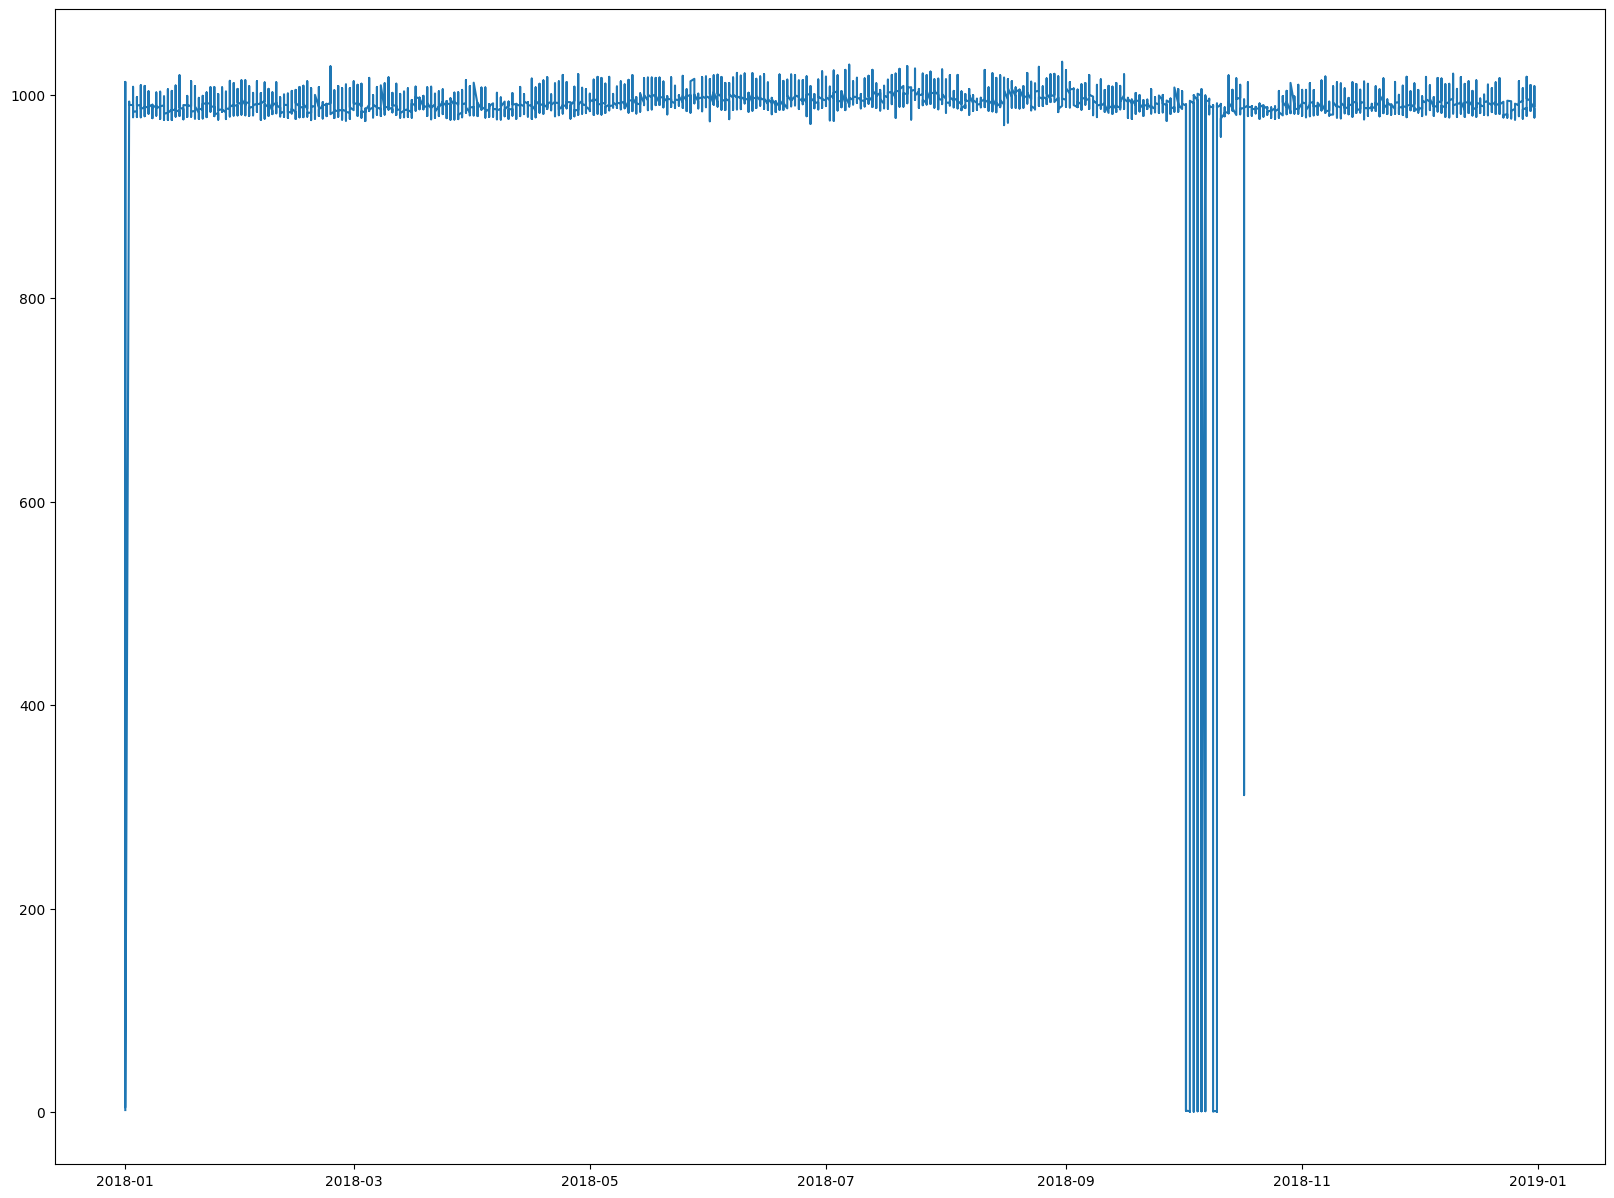

In [71]:
import matplotlib.pyplot as plt
cand_661 = by_day[by_day['dataid'] == 661]
cand_661 = cand_661.sort_values(by=['date', 'hour'])
plt.figure(figsize=(20,15))
plt.plot(cand_661['date'], cand_661['total'])

In [72]:
cand_661[cand_661['total'] < 900]

,dataid,date,hour,total
0,661,2018-01-01,0,2.023
1,661,2018-01-01,1,7.389
18,661,2018-01-01,18,10.617
19,661,2018-01-01,19,22.512
20,661,2018-01-01,20,8.316
...,...,...,...,...
6782,661,2018-10-10,16,0.529
6783,661,2018-10-10,17,0.384
6784,661,2018-10-10,18,0.845
6785,661,2018-10-10,19,0.599


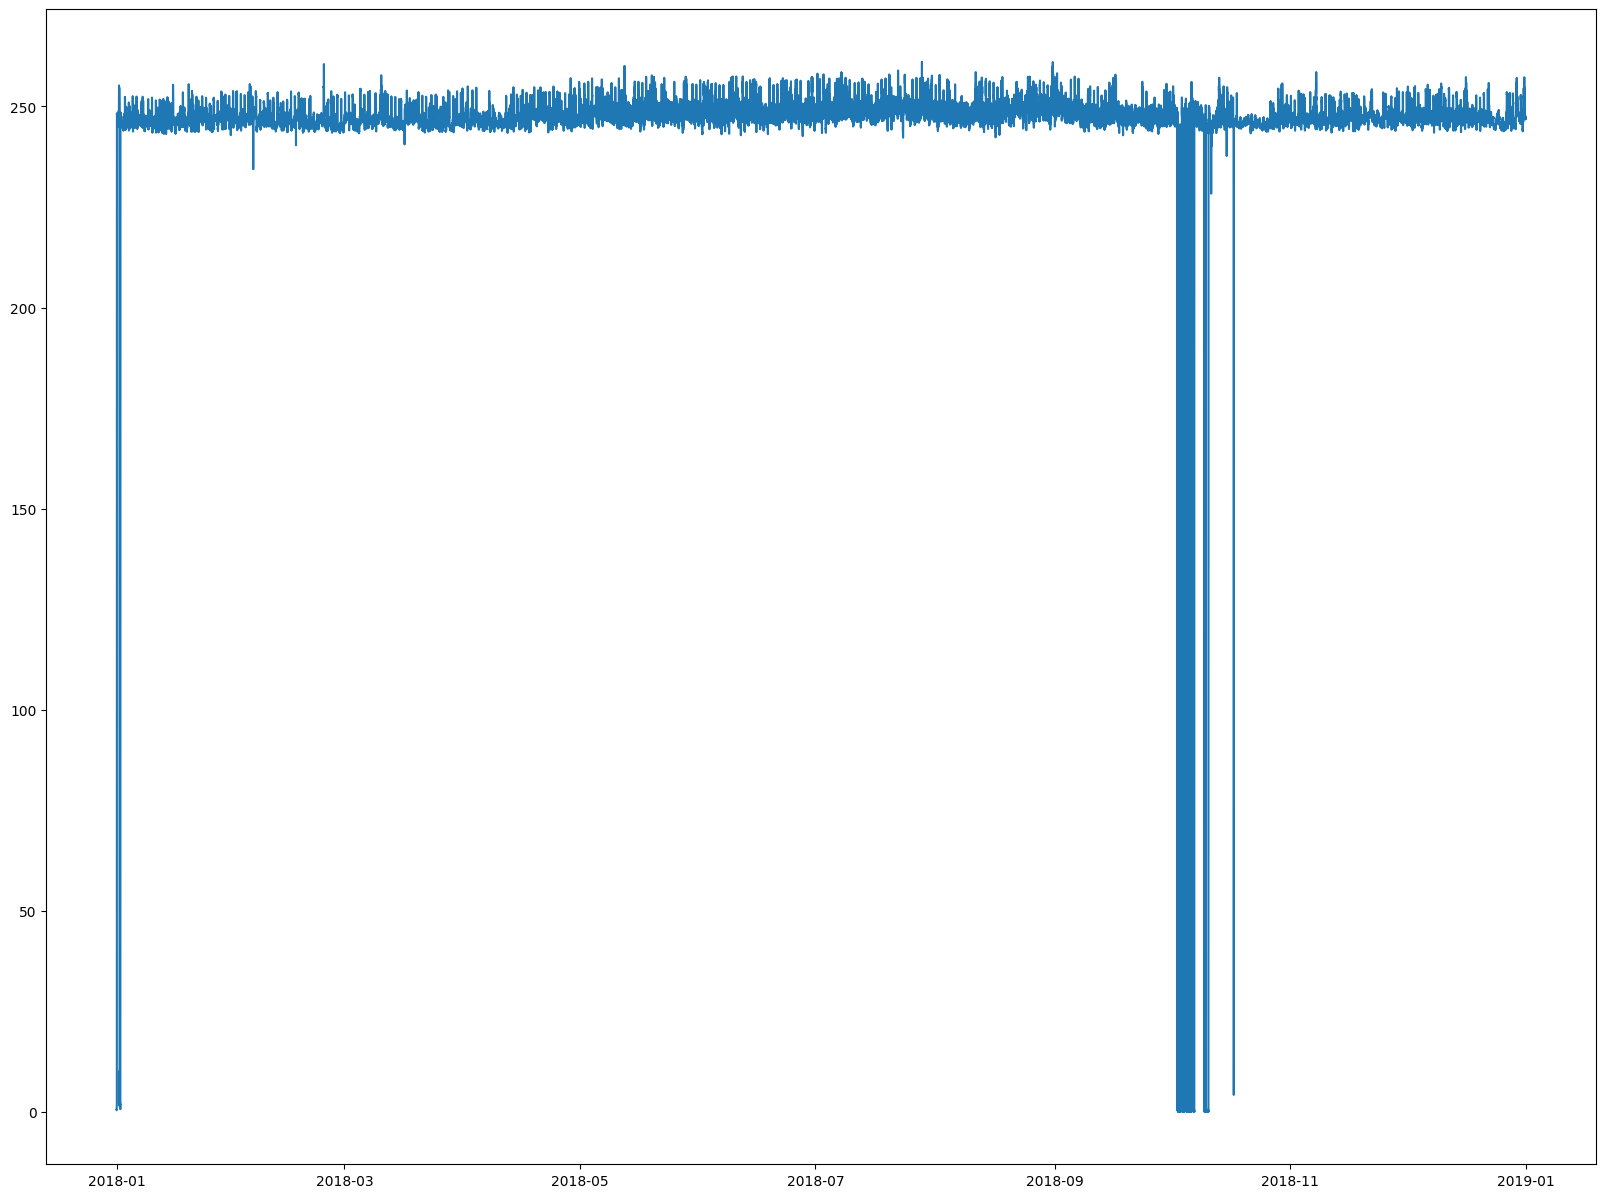

In [25]:
import matplotlib.pyplot as plt
cand_661 = df[df['dataid'] == 661]
cand_661 = cand_661.sort_values(by='local_15min')
plt.figure(figsize=(20,15))
# plt.xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-10')])
# plt.ylim([200, 300])
plt.plot(cand_661['local_15min'], cand_661['total'])

In [45]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(cand_661['total']))
your_dataframe = cand_661[(z_scores < 3)]
your_dataframe

,dataid,date,hour,total
2,661,2018-01-01,2,991.574
3,661,2018-01-01,3,990.731
4,661,2018-01-01,4,987.698
5,661,2018-01-01,5,985.795
6,661,2018-01-01,6,982.269
...,...,...,...,...
8753,661,2018-12-31,19,990.528
8754,661,2018-12-31,20,989.129
8755,661,2018-12-31,21,987.549
8756,661,2018-12-31,22,989.026


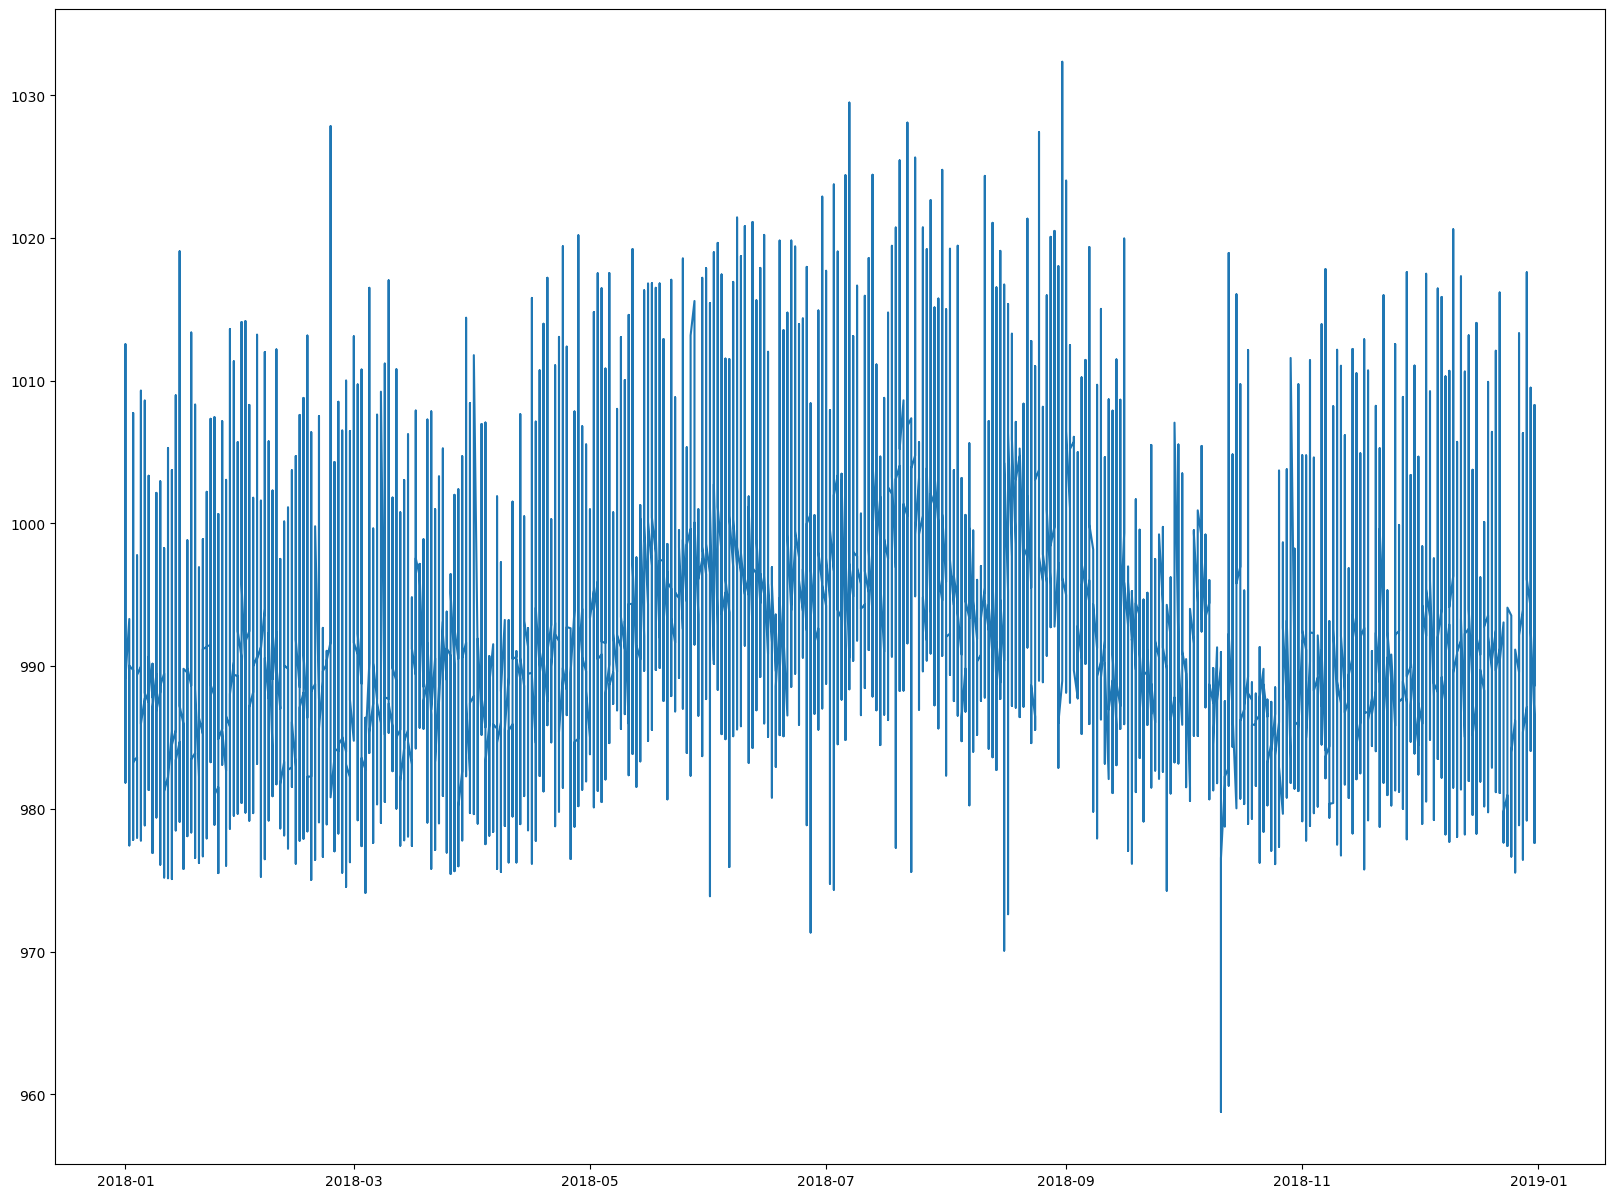

In [74]:
plt.figure(figsize=(20,15))
plt.plot(your_dataframe['date'], your_dataframe['total'])

In [63]:
# load weather data
weather = pd.read_csv('data/15minute_data_austin/3496632.csv')
keep_cols = ['DATE', 'TAVG', 'TMAX', 'TMIN']
aust_weather = weather[keep_cols].groupby(by=['DATE'], as_index=False).mean()
aust_weather['DATE'] = pd.to_datetime(aust_weather['DATE'])

In [67]:
hourly = by_day
hourly['date'] = pd.to_datetime(hourly['date'])

In [68]:
hourly_and_weather = pd.merge(hourly, aust_weather, left_on='date', right_on = 'DATE', how = 'inner')

In [75]:
order = ['dataid', 'DATE', 'hour', 'TMIN', 'TAVG', 'TMAX', 'total']
hourly_and_weather[order].to_csv('aust_hourly.csv', index = False)

## Remove Outliers

In [4]:
aust_hourly = pd.read_csv('data/15minute_data_austin/aust_hourly.csv')

In [110]:
# Function to calculate z-scores
def z_scores(s):
    return (s - s.mean()) / s.std()

# Applying the function to calculate z-scores within each 'dataid' group
aust_hourly['z_score'] = aust_hourly.groupby('dataid')['total'].transform(z_scores)

# Filtering out rows where the absolute z-score is 3 or higher
df_filtered = aust_hourly[(aust_hourly['z_score'].abs() < 2) & (aust_hourly['total'] > 850)]
df_filtered.iloc[:, :-1].to_csv('data/15minute_data_austin/aust_hourly_cleaned.csv', index = False)

In [8]:
# Assuming df is your dataframe
df_filtered = pd.read_csv('data/15minute_data_austin/aust_hourly_cleaned.csv')
df_filtered['datetime'] = pd.to_datetime(df_filtered['DATE']) + pd.to_timedelta(df_filtered['hour'], unit='h')

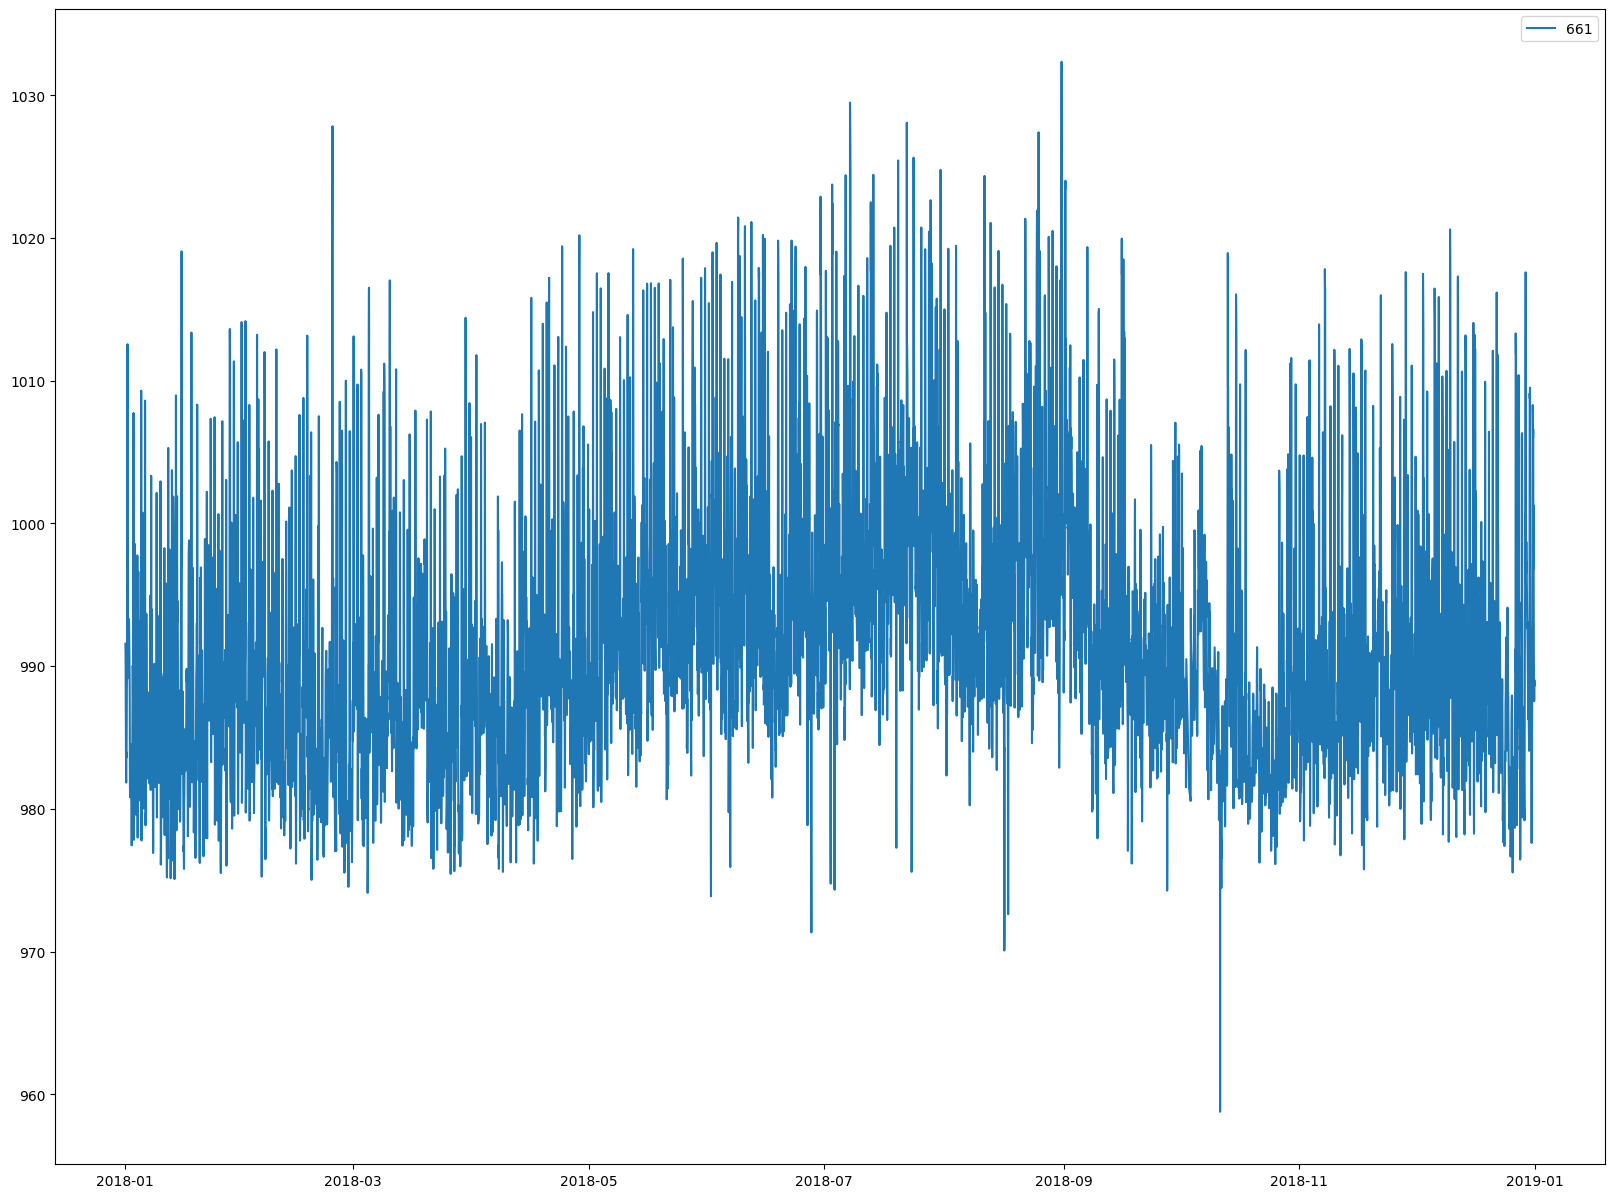

In [10]:
plt.figure(figsize=(20,15))
for id in df_filtered['dataid'].unique():
    if id != 661: continue
    reduced = df_filtered[df_filtered['dataid'] == id].sort_values('datetime')
    plt.plot(reduced['datetime'], reduced['total'], label = f'{id}')
plt.legend()
plt.show()

In [12]:
metadata = pd.read_csv('data/15minute_data_austin/metadata.csv')
metadata

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,...,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines,energy_storage_system,energy_storage_system_l1,energy_storage_system_l2
0,The unique identifier for the home. To be more...,this field will show yes if this participant i...,This field will read Single-Family Home if thi...,participant's city,participant's state,"If eGauge electricity data is present, this fi...","If eGauge electricity data is present, this fi...",This field shows how much one minute data is ...,If eGauge electricity data is present in one s...,If eGauge electricity data is present in one s...,...,This field will show 'yes' if this participant...,This field will show 'yes' if this participant...,This field will show 'yes' if this participant...,This field will show 'yes' if this participant...,This field will show one of the following grou...,This field will show one of the following grou...,This field will show 'yes' if this participant...,eGauge data present for a battery or other typ...,eGauge data present for leg 1 of a battery or ...,eGauge data present for leg 2 of a battery or ...
1,2836,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2743,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5323,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8560,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,7270,yes,Single-Family Home 001 (Master),Detroit,Michigan,2023-09-12 19:00:00-05:00,2023-09-24 02:59:00-05:00,94%,2023-09-12 19:00:00-05:00,2023-09-24 02:00:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,5766,yes,Single-Family Home 001 (Master),Detroit,Michigan,2023-09-12 19:00:00-05:00,2023-09-24 02:59:00-05:00,94%,2023-09-12 19:00:00-05:00,2023-09-16 12:00:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,11853,yes,Single-Family Home 001 (Master),Austin,Texas,2023-09-18 19:00:00-05:00,2023-09-24 00:59:00-05:00,88%,2023-09-18 19:00:00-05:00,2023-09-20 17:00:00-05:00,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,5822,yes,Single-Family Home 001 (Master),Whisper Valley,Texas,2021-01-31 18:00:00-06:00,2023-08-16 11:59:00-05:00,95%,2021-01-31 18:00:00-06:00,2023-08-14 22:00:00-05:00,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
program_cols = [col for col in metadata.columns if 'program' in col]
programs_meta = metadata.loc[1:, ['dataid'] + program_cols]
programs_meta['dataid'] = programs_meta['dataid'].astype(int)
programs_red = programs_meta[programs_meta['dataid'].isin(df_filtered['dataid'].unique())]

In [34]:
threshold = 2
columns_to_drop = [col for col in programs_red.columns if len(pd.unique(programs_red[col])) < threshold]
programs_red.drop(columns=columns_to_drop)

,dataid,program_baseline,program_lg_appliance,program_ccet_group,program_shines
1452,2361,NaN,NaN,NaN,NaN
1501,7719,NaN,NaN,NaN,NaN
1535,8565,NaN,NaN,NaN,NaN
1600,9278,NaN,NaN,NaN,NaN
1611,8386,NaN,NaN,NaN,NaN
1615,7800,NaN,NaN,CCET - Pricing Trial,NaN
1625,3538,NaN,NaN,NaN,NaN
1638,7901,NaN,NaN,CCET - Portal Only,NaN
1646,6139,yes,NaN,CCET - Pricing Trial,NaN
1648,5746,yes,NaN,CCET - Portal Only,NaN


In [ ]:
# test program_baseline -> most variety, average them out maybe


In [24]:
merged = pd.merge(df_filtered, programs_meta, on = 'dataid', how = 'inner')
merged

,dataid,DATE,hour,TMIN,TAVG,TMAX,total,datetime,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
0,661,2018-01-01,2,-4.566667,-2.2,1.100,991.574,2018-01-01 02:00:00,NaN,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,yes
1,661,2018-01-01,3,-4.566667,-2.2,1.100,990.731,2018-01-01 03:00:00,NaN,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,yes
2,661,2018-01-01,4,-4.566667,-2.2,1.100,987.698,2018-01-01 04:00:00,NaN,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,yes
3,661,2018-01-01,5,-4.566667,-2.2,1.100,985.795,2018-01-01 05:00:00,NaN,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,yes
4,661,2018-01-01,6,-4.566667,-2.2,1.100,982.269,2018-01-01 06:00:00,NaN,yes,yes,NaN,NaN,CCET - Pricing Trial,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216749,9922,2018-12-31,19,3.325000,8.2,14.325,987.802,2018-12-31 19:00:00,NaN,yes,yes,NaN,NaN,CCET - Control,NaN,NaN
216750,9922,2018-12-31,20,3.325000,8.2,14.325,989.495,2018-12-31 20:00:00,NaN,yes,yes,NaN,NaN,CCET - Control,NaN,NaN
216751,9922,2018-12-31,21,3.325000,8.2,14.325,1001.382,2018-12-31 21:00:00,NaN,yes,yes,NaN,NaN,CCET - Control,NaN,NaN
216752,9922,2018-12-31,22,3.325000,8.2,14.325,986.242,2018-12-31 22:00:00,NaN,yes,yes,NaN,NaN,CCET - Control,NaN,NaN
